<a href="https://colab.research.google.com/github/gveronese01/Data-Science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro_GV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center><img alt="Rio de Janeiro" width="65%" src="https://www.ecwausa.com/wp-content/uploads/2018/03/Rio-de-Janeiro-Social-Inequality-and-Urban-Violence.jpg"></center>

# Analisando a Violência no Rio de Janeiro

o Estado do Rio de Janeiro seguidamente aparece em noticiários por problemas relacionados à violência urbana existente associada ao tráfico de drogas. Operações policiais dentro de favelas quase sempre acabam em tiroteio, levando pânico à população que ali residem. A guerra por território e comércio de drogas entre as facções, são outros fatores que levam a cidade e o Estado do Rio de Janeiro ao noticiário internacional pelo alto índice de criminalidade.



## Obtenção dos Dados


Os dados deste dataset foram obtidos do ISP - Instituto de Segurança Pública [ISP](http://www.ispdados.rj.gov.br/estatistica.html), que é  uma autarquia vinculada diretamente à Secretaria de Estado de Planejamento e Gestão do Estado do Rio de Janeiro, obtendo-se variáveis que nos ajudaram nesta análise.


### Importando os dados

Importe os dados, usando `df = pd.read_csv("endereço_do_csv")`

In [1]:
#importando bibliotecas
DATA_PATH="https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv"
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
from scipy.stats import norm

#importando dados
df=pd.read_csv(DATA_PATH)



## Análise Inicial dos Dados



Inicialmente vamos verificar a quantidade de variáveis e de entradas em nosso dataset importado do *ISP* a ser estudado.

In [2]:
#tamanho do dataframe

print("O nosso dataset possui:  {} entradas".format(df.shape[0]))
print("O nosso dataset possui:  {} variáveis".format(df.shape[1]))


O nosso dataset possui:  344 entradas
O nosso dataset possui:  56 variáveis


O nome das nossas colunas (variáveis) do nosso dataset são descritas a seguir:

In [3]:
#nome das colunas
print("Nome das colunas: {}".format(df.columns))

Nome das colunas: Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_

As variáveis analisadas em nosso dataset podem ser do tipo:<br>
* int64 - número inteiro;
* float64 - número real;
* object - texto ou mistura de dados numéricos e não numéricos;

Abaixo, as variáveis estão relacionadas conforme o seu tipo:

In [4]:
#tpo de variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Neste estudo, foram analisadas somente 4 variáveis do nosso dataset e descritas a seguir:



*   **hom_doloso**: homicídio doloso;
*   **hom_culposo**: homicídio culposo;
*   **roubo_veiculo**: roubo de veículos;
*   **furto_veiculos**: furto de veículos.



O nosso dataset possui dados desde o ano de 1991 até o ano de 2019, sendo as 5 primeiras entradas a seguir:

In [5]:
#5 primeiras entradas
df.head(5)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


As últimas 5 entradas do nosso dataset, referentes ao ano de 2019, estão descritas abaixo:

In [6]:
#últimas 5 entradas
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Transformamos a coluna **vano**, correspondente ao ano de entrada de coleta da informação,  em index do nosso dataset.

In [7]:
#transformando a coluna "vano" para index
df.set_index(["vano"]) 
#converter coluna "vano" como datetime
df["vano"]=pd.to_datetime(df["vano"], format="%Y")


No arquivo .csv, importado do site ISP do Rio de Janeiro que foi a base de dados deste dataset, foram encontradas entradas com valores nulos ou ausentes. Abaixo foi feito um somatório destes valores para cada variável.

In [8]:
#soma de valores nulos
df.isnull().sum()


vano                            0
mes                             0
hom_doloso                      0
lesao_corp_morte               96
latrocinio                      0
hom_por_interv_policial        84
tentat_hom                      0
lesao_corp_dolosa               0
estupro                       144
hom_culposo                    84
lesao_corp_culposa             96
roubo_comercio                  0
roubo_residencia                0
roubo_veiculo                   0
roubo_carga                     0
roubo_transeunte                0
roubo_em_coletivo               0
roubo_banco                     0
roubo_cx_eletronico           144
roubo_celular                 108
roubo_conducao_saque          144
roubo_apos_saque              144
roubo_bicicleta               276
outros_roubos                   0
total_roubos                    0
furto_veiculos                  0
furto_transeunte                0
furto_coletivo                144
furto_celular                 144
furto_biciclet

Optou-se por deletar do nosso dataset somente as entradas ausentes ou nulas das variáveis que iremos analisar **hom_doloso, hom_culposo, roubo_veiculo, furto_veiculos**.

In [9]:
#apagando entradas com valores nulos
df.dropna(axis=0, subset=["hom_doloso", "hom_culposo", "roubo_veiculo", "furto_veiculos"], inplace=True)

Após a eliminação dos valores nulos, o nosso dataset teve seu ano de início alterado de 1991 para o ano de 1998, bem como redução da quantidade de entradas, reduzindo o seu tamanho final.

In [10]:
df.head()


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
84,1998-01-01,1,577,NaN,14,18.0,236,5377,NaN,323.0,NaN,380,72,1799,320,1100,614,11,NaN,NaN,NaN,NaN,NaN,1031,5327,1754,705,NaN,NaN,NaN,4355,6814,NaN,NaN,NaN,NaN,991,NaN,NaN,NaN,968,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,609,1714,1799,NaN,3
85,1998-01-01,2,519,NaN,7,23.0,241,4714,NaN,259.0,NaN,330,74,1582,255,1015,564,11,NaN,NaN,NaN,NaN,NaN,1088,4919,1575,623,NaN,NaN,NaN,3779,5977,NaN,NaN,NaN,NaN,1102,NaN,NaN,NaN,912,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,549,1579,1582,NaN,3
86,1998-01-01,3,606,NaN,11,35.0,204,5216,NaN,312.0,NaN,394,59,1762,309,1054,610,19,NaN,NaN,NaN,NaN,NaN,1191,5398,1889,564,NaN,NaN,NaN,4582,7035,NaN,NaN,NaN,NaN,1004,NaN,NaN,NaN,1029,NaN,NaN,NaN,NaN,NaN,NaN,110,NaN,NaN,NaN,652,1664,1762,NaN,3
87,1998-01-01,4,518,NaN,10,41.0,207,4484,NaN,373.0,NaN,350,67,1750,220,911,597,18,NaN,NaN,NaN,NaN,NaN,1297,5210,1869,513,NaN,NaN,NaN,4021,6403,NaN,NaN,NaN,NaN,1056,NaN,NaN,NaN,1009,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,NaN,NaN,569,1508,1750,NaN,3
88,1998-01-01,5,489,NaN,12,41.0,211,3883,NaN,350.0,NaN,305,93,1768,246,795,558,10,NaN,NaN,NaN,NaN,NaN,1284,5059,1981,322,NaN,NaN,NaN,3963,6266,NaN,NaN,NaN,NaN,1240,NaN,NaN,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,542,1353,1768,NaN,3


In [11]:
#tamanho do dataframe após a limpeza

print("O nosso novo dataset possui:  {} entradas".format(df.shape[0]))
print("O nosso novo dataset possui:  {} variáveis".format(df.shape[1]))

O nosso novo dataset possui:  260 entradas
O nosso novo dataset possui:  56 variáveis


In [12]:
df.isnull().sum()

vano                            0
mes                             0
hom_doloso                      0
lesao_corp_morte               12
latrocinio                      0
hom_por_interv_policial         0
tentat_hom                      0
lesao_corp_dolosa               0
estupro                        60
hom_culposo                     0
lesao_corp_culposa             12
roubo_comercio                  0
roubo_residencia                0
roubo_veiculo                   0
roubo_carga                     0
roubo_transeunte                0
roubo_em_coletivo               0
roubo_banco                     0
roubo_cx_eletronico            60
roubo_celular                  24
roubo_conducao_saque           60
roubo_apos_saque               60
roubo_bicicleta               192
outros_roubos                   0
total_roubos                    0
furto_veiculos                  0
furto_transeunte                0
furto_coletivo                 60
furto_celular                  60
furto_biciclet

## Informações Estatísticas da Violência no Rio de Janeiro

Usando o método *describe*, obtem-se o resumo estatístico deste dataset. Através deste método, conseguimos dados como a média, desvio padrão, valor máximo, valor mínimo e seus percentis;
<br>



In [13]:
#método describe
df.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,260.000000,260.000000,248.000000,260.000000,260.00000,260.000000,260.000000,200.000000,260.000000,248.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,200.000000,236.000000,200.000000,200.000000,68.000000,260.000000,260.000000,260.000000,260.000000,200.000000,200.000000,68.000000,260.000000,260.000000,248.000000,200.000000,200.000000,200.000000,260.000000,164.000000,164.000000,164.000000,260.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,260.000000,212.000000,200.000000,200.00000,260.000000,260.000000,260.000000,248.000000,260.000000
mean,6.438462,460.253846,4.334677,15.100000,71.90000,367.307692,6210.496154,369.945000,212.119231,3410.762097,483.973077,121.946154,2644.303846,399.088462,4213.192308,734.526923,4.738462,3.550000,957.974576,11.320000,145.665000,10.808824,1533.680769,11131.311538,1567.203846,1772.811538,650.230000,1449.175000,124.808824,6897.553846,11885.138462,0.665323,133.265000,7.755000,2231.860000,1325.496154,609.237805,759.146341,186.146341,2005.623077,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,62.142308,3.301887,2.085000,0.34000,551.388462,5817.265385,2644.303846,53794.161290,2.992308
std,3.446231,86.047469,2.755357,5.641613,36.48882,106.885884,936.543932,94.392434,54.234700,776.156561,108.410253,27.079409,792.200013,224.882577,2324.937198,303.452698,4.834007,2.634808,624.309034,6.404113,55.392367,7.767628,635.890105,3970.417944,205.980396,986.818122,268.836273,368.638776,80.247427,1298.546393,3043.270319,0.959128,43.303821,5.089646,772.093064,519.624779,246.307700,312.871487,36.221243,571.772787,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,32.304042,2.192922,1.761616,0.63752,100.104960,2960.768225,792.200013,11039.051992,0.087536
min,1.000000,272.000000,0.000000,4.000000,10.00000,165.000000,2521.000000,188.000000,111.000000,848.000000,277.000000,49.000000,1413.000000,72.000000,722.000000,303.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,782.000000,4664.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,3089.000000,5795.000000,0.000000,23.000000,0.000000,717.000000,632.000000,248.000000,262.000000,114.000000,912.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,7.000000,0.000000,0.000000,0.00000,334.000000,1248.000000,1413.000000,30621.000000,2.000000
25%,3.000000,386.750000,2.000000,11.000000,41.75000,300.500000,5581.750000,282.000000,176.000000,3040.000000,398.000000,104.000000,2137.750000,256.750000,1613.750000,530.500000,1.000000,2.000000,549.750000,6.000000,106.000000,2.250000,1060.250000,8734.500000,1390.750000,813.750000,501.000000,1297.000000,3.750000,6129.000000,9506.000000,0.000000,109.750000,4.750000,1654.500000,910.250000,360.500000,426.000000,160.000000,1618.250000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,38.750000,2.000000,1.000000,0.00000,479.000000,3170.500000,2137.750000,45374.500000,3.000000
50%,6.000000,464.000000,4.000000,14.000000,70.00000,352.000000,6249.500000,384.000000,203.000000,3372.000000,456.500000,121.500000,2523.000000,327.500000,4539.000000,662.500000,3.000000,3.000000,717.500000,10.00000

Calculando a média do roubo e do furto de veículos

In [14]:
#Analisando as variaveis roubo de veiculos e furto de veiculos
print("Média do roubo de veículos:  {}".format(df["roubo_veiculo"].median()))
print("Mèdia do furto de veículos:  {}".format(df["furto_veiculos"].median()))



Média do roubo de veículos:  2523.0
Mèdia do furto de veículos:  1547.0


Os valores máximo e mínimo das variáveis *hom_doloso* e *hom_culposo*:

In [15]:
# imprimir os valores máximos e mínimos
print("Valor máximo de homicídio doloso:\t{}".format(df.hom_doloso.max()))
print("Valor mínimo de homicídio doloso:\t{}".format(df.hom_doloso.min()))

print("Valor máximo de homicídio culposo:\t{}".format(df.hom_culposo.max()))
print("Valor mínimo de homicídio culposo:\t{}".format(df.hom_culposo.min()))

Valor máximo de homicídio doloso:	682
Valor mínimo de homicídio doloso:	272
Valor máximo de homicídio culposo:	449.0
Valor mínimo de homicídio culposo:	111.0


Fizemos uma busco em nosso dataset para localizar a entrada referente aos maiores e menores valores de homicídio doloso e homicídio culposo.

*   *Homicídio Doloso*: menor valor em Junho do ano de 2015 e o maior valor em Março de 2005;
* *Homicídio Culposo*: menor valor em Março de 2016 e maior valor em dezembro de 1999;

In [16]:
#verificar mês referente aos valore mínimo homicidio doloso
df[df.hom_doloso == df.hom_doloso.min()]


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015-01-01,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [17]:
#verificar mês referente ao valor máximo homicidio doloso
df[df.hom_doloso==df.hom_doloso.max()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
170,2005-01-01,3,682,2.0,26,94.0,345,6749,317.0,249.0,3034.0,464,167,3056,442,2876,811,1,11.0,553.0,19.0,174.0,NaN,1621,10195,1811,943,340.0,1291.0,NaN,6613,10998,0.0,235.0,5.0,1277.0,1011,NaN,NaN,NaN,2459,NaN,NaN,NaN,NaN,5885.0,423.0,86,7.0,4.0,1.0,804,4240,3056,50182.0,3


In [18]:
#verificar mês referente aos valore mínimo homicidio culposo
df[df.hom_culposo == df.hom_culposo.min()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
302,2016-01-01,3,445,2.0,18,61.0,552,6356,380.0,111.0,2929.0,599,97,3392,636,7455,909,3,10.0,1448.0,11.0,85.0,17.0,1532,16194,1409,2466,919.0,1514.0,173.0,7691,14172,0.0,195.0,6.0,3271.0,2287,843.0,1282.0,213.0,2499,3352.0,1020.0,1640.0,76.0,6167.0,501.0,59,6.0,4.0,0.0,526,9812,3392,68196.0,3


In [19]:
#verificar mês referente aos valore max homicidio culposo
df[df.hom_culposo == df.hom_culposo.max()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
107,1999-01-01,12,478,11.0,8,26.0,250,6087,NaN,449.0,3677.0,389,117,2137,95,1346,586,6,NaN,NaN,NaN,NaN,NaN,1629,6305,1417,690,NaN,NaN,NaN,4960,7067,0.0,NaN,NaN,NaN,753,NaN,NaN,NaN,1082,NaN,NaN,NaN,NaN,3532.0,NaN,99,NaN,NaN,NaN,523,1932,2137,34179.0,3


In [20]:
#verificar mínimo e máximo roubo e furto de veículos

# imprimir os valores máximos e mínimos
print("Valor máximo de roubo de veículos:\t{}".format(df.roubo_veiculo.max()))
print("Valor mínimo de roubo de veículos:\t{}".format(df.roubo_veiculo.min()))

print("Valor máximo de furto de veículos:\t{}".format(df.furto_veiculos.max()))
print("Valor mínimo de furto de veículos:\t{}".format(df.furto_veiculos.min()))



Valor máximo de roubo de veículos:	5358
Valor mínimo de roubo de veículos:	1413
Valor máximo de furto de veículos:	2041
Valor mínimo de furto de veículos:	1159


A mesma busca também foi feita em nosso dataset para localizar a entrada referente aos maiores e menores valores de roubo e furto de veículos;

*   *Roubo de Veículos*: menor valor em Novembro do ano de 2010 e o maior valor em Março de 2018;
* *Furto de Veículos*: menor valor em Fevereiro de 2018 e maior valor em Julho de 2006;

In [21]:
#verificar o mês com maior roubo de veículos
df[df.roubo_veiculo==df.roubo_veiculo.max()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
326,2018-01-01,3,508,6.0,20,109.0,553,5473,452.0,171.0,2308.0,638,115,5358,918,7638,1385,2,5.0,2183.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,643,11206,5358,66035.0,3


In [22]:
#verificar o mês com menor roubo de veículos
df[df.roubo_veiculo==df.roubo_veiculo.min()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
238,2010-01-01,11,364,1.0,7,102.0,368,6606,442.0,182.0,3291.0,338,107,1413,266,4925,646,1,3.0,518.0,6.0,138.0,NaN,801,9162,1318,2333,869.0,1713.0,NaN,7237,13470,1.0,135.0,7.0,2150.0,1391,509.0,721.0,187.0,1271,1993.0,451.0,1057.0,54.0,6449.0,462.0,40,4.0,2.0,0.0,474,6089,1413,54447.0,3


In [23]:
#verificar mês com maior furto de veículos
df[df.furto_veiculos==df.furto_veiculos.max()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
186,2006-01-01,7,478,5.0,15,88.0,268,5705,272.0,232.0,3071.0,373,153,2627,341,3898,924,6,0.0,702.0,21.0,182.0,NaN,797,10024,2041,1633,459.0,1739.0,NaN,5918,11790,1.0,82.0,7.0,1586.0,1038,404.0,431.0,224.0,2198,1261.0,272.0,840.0,31.0,4850.0,356.0,69,4.0,3.0,1.0,586,5524,2627,50777.0,3


In [24]:
#verificar mês com menor furto de veiculos
df[df.furto_veiculos==df.furto_veiculos.min()]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
325,2018-01-01,2,441,5.0,21,102.0,494,5087,446.0,129.0,1793.0,552,113,4792,742,7268,1011,1,5.0,2154.0,1.0,65.0,4.0,2976,19684,1159,2327,548.0,1578.0,116.0,6691,12419,0.0,107.0,12.0,2137.0,1588,572.0,913.0,132.0,3292,2505.0,503.0,1206.0,151.0,4261.0,334.0,41,0.0,2.0,0.0,569,10433,4792,61383.0,3


Conseguimos também calcular a média % de carros recuperados com os dados do dataset.

In [25]:
# % de veiculos recuperados
porcent_carro = (df["recuperacao_veiculos"].median()/(df["roubo_veiculo"].median() + df["furto_veiculos"].median()))*100
print("A porcentagem de carros recuperados mensal em média % é:  {}".format(porcent_carro))

A porcentagem de carros recuperados mensal em média % é:  48.796068796068795


## Visualização de Dados


Foi criado dois histogramas para visualizar a distribuição de frequência das variáveis estudadas, juntamente com sua curva de distribuição normal .<br> No eixo *Y* teremos a fração da área total correspondente a esta entrada em nosso dataset.
A média mensal de homicídio doloso ficou em torno de 464 e seu desvio padrão 86.<br>
A média mensal de homicídio culposo foi de 203 e seu desvio padrão menor, em torno de 54, o que evidencia pelo corpo do histograma menor, conforme gráficos abaixo.

In [26]:
#Analisando as variáveis média mensal de homicídio doloso e homicídio culposo
print("Média mensal de homicídio doloso:  {}".format(df["hom_doloso"].median()))
print("Desvio Padrão homicídio doloso:  {}".format(df["hom_doloso"].std()))
print("Mèdia mensal de homicídio culposo:  {}".format(df["hom_culposo"].median()))
print("Desvio Padrão de homicídio culposo:  {}".format(df["hom_culposo"].std()))

Média mensal de homicídio doloso:  464.0
Desvio Padrão homicídio doloso:  86.04746930367548
Mèdia mensal de homicídio culposo:  203.0
Desvio Padrão de homicídio culposo:  54.234700308499114


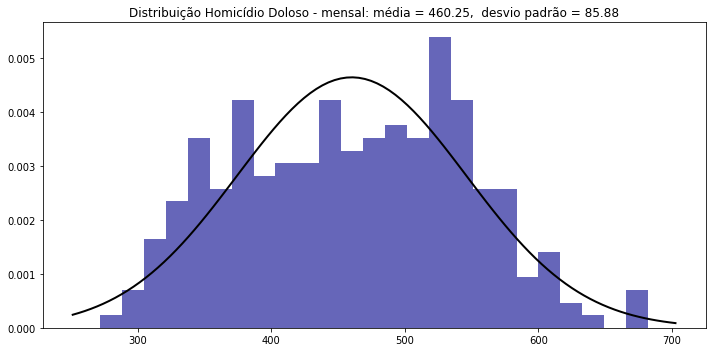

In [27]:
#histograma das variáveis numéricas
fig, (ax1) =plt.subplots(1, 1, figsize=(10, 5));


# Plot the histogram.
ax1.hist(df["hom_doloso"], bins=25, density=True, alpha=0.6, color='darkblue')

# Fit a normal distribution to the data:
mu, std = norm.fit(df["hom_doloso"])

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Distribuição Homicídio Doloso - mensal: média = %.2f,  desvio padrão = %.2f" % (mu, std)
plt.title(title)

plt.tight_layout();

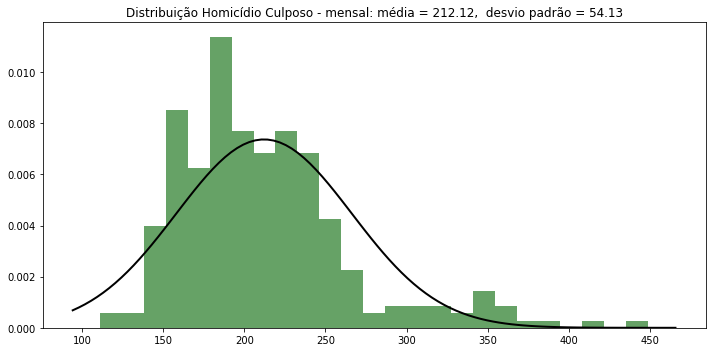

In [28]:

#histograma das variáveis numéricas
fig, (ax1) =plt.subplots(1, 1, figsize=(10, 5));
ax1.hist(df["hom_culposo"], bins=25, density=True, alpha=0.6, color='darkgreen')

# Fit a normal distribution to the data:
mu, std = norm.fit(df["hom_culposo"])

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Distribuição Homicídio Culposo - mensal: média = %.2f,  desvio padrão = %.2f" % (mu, std)
plt.title(title);
plt.tight_layout();

Verificamos o quantidade de homicídios dolosos e culposos ao longo dos meses do ano. Sendo o mês número 1 o mês de janeiro, e o mês número 12 o mês de dezembro.
- Percebe-se uma quantidade maior de homicídios dolosos no primeiro semestre do ano;
- A quantidade de homicídios culposos não apresenta grandes variações durante o ano. Sendo o mês de Fevereiro e Novembro os meses que apresentaram as menores médias.

In [29]:
#criando variável para somar entradas em cada mês para homicídio doloso e homicídio culposo
hd=df.groupby(["mes"]).sum()

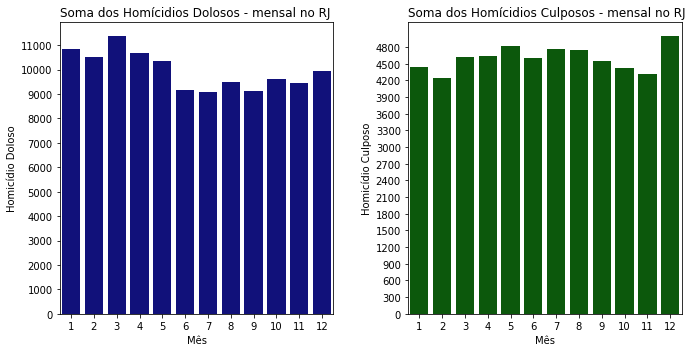

In [30]:
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(10, 5));
sns.barplot(data=hd, x=hd.index, y="hom_doloso", color="darkblue", ax=ax1);
ax1.set_title("Soma dos Homícidios Dolosos - mensal no RJ", loc="left");
ax1.set_xlabel("Mês")
ax1.grid(False)
ax1.set_ylabel("Homicídio Doloso")
ax1.yaxis.set_ticks(np.arange(0, 12000, 1000))



sns.barplot(data=hd, x=hd.index, y="hom_culposo", color="darkgreen", ax=ax2);
ax2.set_title("Soma dos Homícidios Culposos - mensal no RJ", loc="left");
ax2.set_xlabel("Mês")
ax2.grid(False)
ax2.yaxis.set_ticks(np.arange(0, 5000, 300))
ax2.set_ylabel("Homicídio Culposo")

plt.tight_layout();


Abaixo uma análise da quantidade de homicídio ao longo dos últimos anos.

*       Em 2002 tivemos a maior média de homicídios dolosos, em torno de 573 casos registrados;<br>
*      Entre os anos de 2002 e 2007 tivemos uma média mensal de homicídios dolosos superior a 500 casos;
*      Há uma tendência de queda da quantidade de homicídio doloso, sendo o ano de 2019 o ano com a menor média, em torno de 339 casos.

*    Em 1998 tivemos a menor média de homicídios culposos, com o valor aproximado de 348 casos e desde então esta média vem reduzindo, tendo o seu valor mínimo no ano de 2016 com 148 casos..<br>





In [31]:
# homicídio doloso - média dos valores decrescentes
df.groupby(["vano"]).hom_doloso.mean().sort_values(ascending=False)

vano
2002-01-01    573.750000
2003-01-01    552.000000
2005-01-01    551.666667
2004-01-01    536.500000
2006-01-01    526.916667
2000-01-01    523.916667
2001-01-01    513.583333
2007-01-01    511.083333
1999-01-01    490.666667
2009-01-01    482.750000
1998-01-01    477.166667
2008-01-01    476.416667
2017-01-01    445.500000
2016-01-01    420.166667
2018-01-01    412.500000
2014-01-01    411.833333
2010-01-01    397.250000
2013-01-01    395.416667
2011-01-01    356.583333
2015-01-01    350.000000
2012-01-01    340.083333
2019-01-01    339.625000
Name: hom_doloso, dtype: float64

In [32]:
# homicídio culposo - média dos valores decrescentes
df.groupby(["vano"]).hom_culposo.mean().sort_values(ascending=False)

vano
1998-01-01    342.333333
1999-01-01    331.083333
2001-01-01    245.000000
2007-01-01    243.500000
2005-01-01    232.083333
2008-01-01    229.416667
2000-01-01    223.166667
2006-01-01    219.083333
2002-01-01    211.666667
2004-01-01    210.833333
2011-01-01    209.416667
2012-01-01    203.666667
2010-01-01    200.000000
2003-01-01    198.083333
2009-01-01    197.750000
2013-01-01    185.916667
2017-01-01    176.000000
2014-01-01    173.333333
2018-01-01    163.083333
2019-01-01    154.875000
2015-01-01    148.666667
2016-01-01    148.583333
Name: hom_culposo, dtype: float64

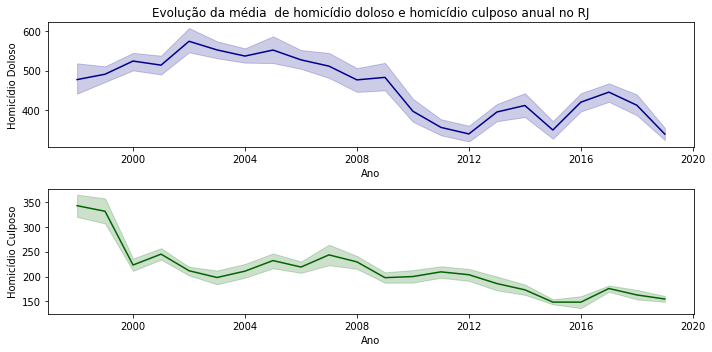

In [33]:
#plotando gráfico para média da evolução homicídio doloso e culposo ao longo dos anos
fig, (ax1, ax2) =plt.subplots(2, 1, figsize=(10, 5));

sns.lineplot(data=df, x=df["vano"], y=df["hom_doloso"], ax=ax1, color="darkblue");
ax1.grid(False)
ax1.set_title("Evolução da média  de homicídio doloso e homicídio culposo anual no RJ")
ax1.grid(False)
ax1.set_ylabel("Homicídio Doloso")
ax1.set_xlabel("Ano")





sns.lineplot(data=df, x=df["vano"], y=df["hom_culposo"], ax=ax2, color="darkgreen");
ax2.grid(False)
ax2.set_ylabel("Homicídio Culposo")

ax2.set_xlabel("Ano");



plt.tight_layout();


*                Em 2017 tivemos a maior média de roubo de veículos com 4.530 registros, enquanto que o no ano de 2011 e 2010 tivemos a menor média, com valores de 1564 e 1671 casos respectivamente.
*               O furto de veículos teve sua maior média em 2006 com 1886 casos.
*               Em 2011 tivemos a menor média de furto de veículos com 1299 casos.

In [34]:
# roubo de veículos - média dos valores decrescentes
df.groupby(["vano"]).roubo_veiculo.mean().sort_values(ascending=False)

vano
2017-01-01    4530.500000
2018-01-01    4341.416667
2019-01-01    3501.500000
2016-01-01    3474.666667
2002-01-01    2869.333333
2006-01-01    2860.333333
2003-01-01    2794.250000
2005-01-01    2724.166667
2014-01-01    2720.916667
2004-01-01    2700.666667
2007-01-01    2624.166667
2015-01-01    2586.250000
1999-01-01    2472.166667
2001-01-01    2341.583333
2013-01-01    2333.500000
2008-01-01    2320.583333
2000-01-01    2310.666667
2009-01-01    2086.333333
2012-01-01    1838.750000
1998-01-01    1793.250000
2010-01-01    1671.000000
2011-01-01    1564.416667
Name: roubo_veiculo, dtype: float64

In [35]:
# furto de veículos - média dos valores decrescentes
df.groupby(["vano"]).furto_veiculos.mean().sort_values(ascending=False)

vano
2006-01-01    1886.416667
2007-01-01    1805.666667
2008-01-01    1802.333333
2005-01-01    1776.833333
1998-01-01    1775.750000
2002-01-01    1726.666667
1999-01-01    1710.250000
2009-01-01    1695.166667
2003-01-01    1661.833333
2004-01-01    1620.750000
2010-01-01    1562.666667
2001-01-01    1516.416667
2000-01-01    1480.000000
2014-01-01    1473.583333
2013-01-01    1472.333333
2015-01-01    1412.000000
2016-01-01    1396.583333
2012-01-01    1355.250000
2019-01-01    1351.500000
2018-01-01    1316.166667
2017-01-01    1309.000000
2011-01-01    1299.416667
Name: furto_veiculos, dtype: float64

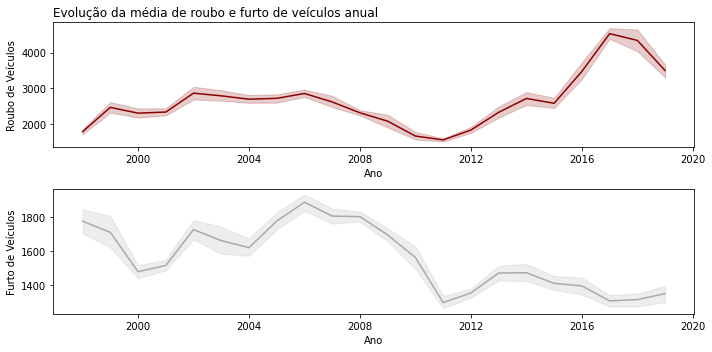

In [36]:
#plotando gráfico
fig, (ax1, ax2)= plt.subplots(2,1, figsize=(10,5))

sns.lineplot(data=df, x=df["vano"], y=df["roubo_veiculo"], ax=ax1, color="darkred");
ax1.set_title("Evolução da média de roubo e furto de veículos anual", loc="left")
ax1.grid(False)
ax1.set_ylabel("Roubo de Veículos")
ax1.set_xlabel("Ano")


sns.lineplot(data=df, x=df["vano"], y=df["furto_veiculos"], ax=ax2, color="darkgray");
ax2.grid(False)
ax2.set_ylabel("Furto de Veículos")
ax2.set_xlabel("Ano")
plt.tight_layout()

*                   A média da taxa de recuperação de veículos tem se mantido em torno de  50% desde o ano de 2014;
*                  Os anos de 1998 e 1999 foram os anos com menores médias de recuperação de carros com aproximadamente 30% de veículos recuperados;
*                 os anos de 2002, 2003 e 2017 foram os anos com maiores médias de recuperação de veículos com 55% de veículos recuperados.

In [37]:
# Criando variável taxa de recuperação de carros
taxa_recu=100*(df["recuperacao_veiculos"]/(df["roubo_veiculo"] + df["furto_veiculos"]))
df["recuperacao_carro"]=taxa_recu


In [38]:
# recuperação de veículos - média dos valores decrescentes
df.groupby(["vano"]).recuperacao_carro.mean().sort_values(ascending=False)

vano
2002-01-01    56.136034
2003-01-01    56.012211
2017-01-01    53.709508
2018-01-01    53.562296
2001-01-01    51.318894
2004-01-01    51.101232
2014-01-01    50.115709
2019-01-01    49.857029
2015-01-01    49.350504
2016-01-01    49.213882
2005-01-01    48.698536
2000-01-01    48.153701
2011-01-01    46.994690
2013-01-01    46.781363
2007-01-01    46.049916
2006-01-01    45.775029
2012-01-01    45.481160
2009-01-01    43.917752
2010-01-01    42.829318
2008-01-01    42.577279
1999-01-01    31.432281
1998-01-01    28.405215
Name: recuperacao_carro, dtype: float64

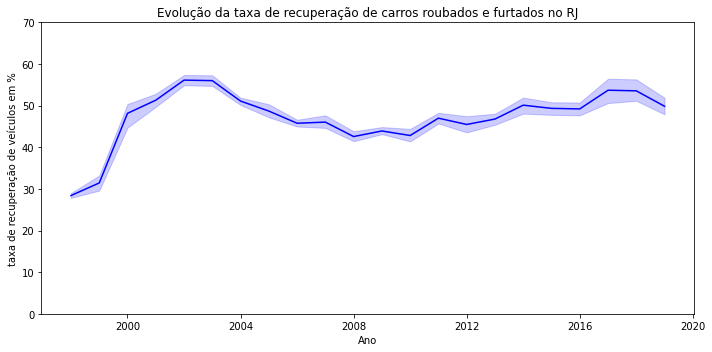

In [39]:
#plotando gráfico taxa de recuperação de carros roubados e furtados
fig, (ax1)= plt.subplots(1,1, figsize=(10,5))

sns.lineplot(data=df, x=df["vano"], y=taxa_recu, ax=ax1, color="blue");
ax1.set_title("Evolução da taxa de recuperação de carros roubados e furtados no RJ")
ax1.grid(False)
ax1.set_ylabel("taxa de recuperação de veículos em %")
ax1.set_xlabel("Ano")
ax1.set_ylim(0, 70)
ax1.set_xlabel("Ano")


plt.tight_layout();


## Conclusão

Após analisar os dados sobre a violência no Estado do Rio de Janeiro, concluímos que:<br>
*           As taxas de homícidios doloso são maiores no primeiro semestre do ano, muito influenciada pelo grande movimento que ocorre de turistas na época do verão em cidades litorâneas;
*           Entre os meses de Janeiro e Março do ano de 2017, a polícia do Estado do RJ estava em greve, o que pode ter gerarado uma subnotificação de registro de ocorrências, exceto para fatos envolvendo óbito e roubo de veículo, conforme relato da ISP.
*        Nos últimos anos, a quantidade de homicídio culposo e homicídio doloso tem apresentando constante queda, próximo aos valores de mínima histórica, refletindo uma melhoria no indicador de segurança pública no Estado do Rio de Janeiro.